In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from math import  pi, exp,log, sqrt
from scipy.stats import norm
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
from dask import dataframe as dd
from numpy import abs
from math import fabs

In [177]:
tll = "MSFT"
path = 'dataset/MSFT_n.csv'
df = pd.read_csv(path)
df.head(3)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,0,2/1/2019 9:30,103.868,0.000000,103.87,103.98,103.50,1.235296e+08,2322,103.900,1189287
1,1,2/1/2019 9:31,103.873,0.000048,103.83,103.95,103.77,1.152119e+07,937,103.859,110916
2,2,2/1/2019 9:32,103.720,-0.001425,103.70,103.82,103.59,1.372207e+07,934,103.820,132299


In [178]:
def read():
    df = pd.read_csv(path)
    df["return"] =  df["marketClose"] - df["marketOpen"] 
    return df

In [179]:
df["return"] =  df["marketClose"] - df["marketOpen"] 
df[-3:].head(3)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return
5847,5847,2/22/2019 15:57,110.872,0.008147,110.880,110.91,110.765,17116314.42,1244,110.870,154379,0.010
5848,5848,2/22/2019 15:58,110.935,0.008720,110.975,110.99,110.799,38332001.33,2300,110.875,345535,0.100
5849,5849,2/22/2019 15:59,110.931,0.008684,110.965,111.00,110.860,69797788.11,3729,110.980,629197,-0.015


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

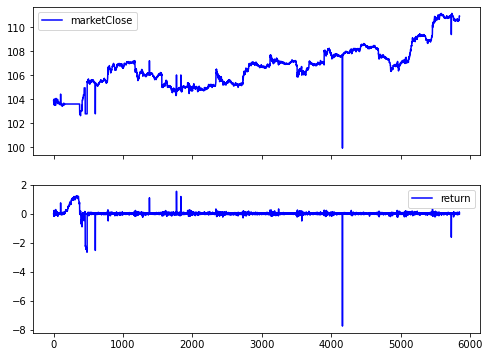

In [63]:
df[['marketClose','return']].plot(subplots = True,color = 'blue',figsize=(8,6))

In [85]:
def cal(data,k,p,t):
    
    df = data
    df['temp'] = 0
    df['tempsum'] = 0
    df['sum'] = 0
    df['action'] = 'hold'
    
    for i in range(1, k + 1):
        
        df['temp'] = (df['marketAverage'].shift(-i) - df['marketClose']) / df['marketClose']
    
    df['tempsum'].loc[(abs (df['temp']) > p)] = abs(df['temp'])
    
    df['sum'] = df.tempsum.rolling(window=k).sum()
    
    df['action'].loc[(df['temp'] >= t)] = 'buy'
    df['action'].loc[(df['temp'] <= -t)] = 'sell'
    
    return df

C:\Users\chsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


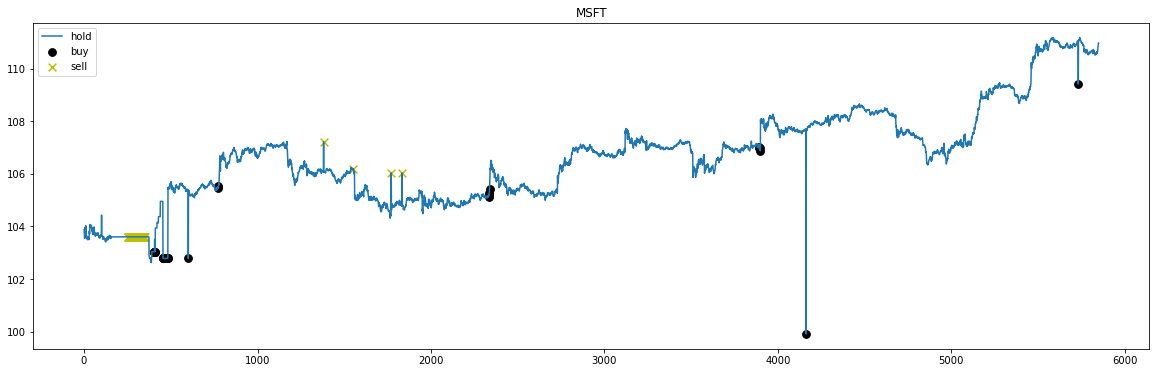

In [180]:

def get_markers1(data, t):
    
    val = data['marketClose']
    v = data['return']
    th = []
    marker = []
    df = data
    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = v[i] - v[i-1]
            th.append(x)
    
    data['Value'] = th
    
    df = data[data['action'] == 'buy']
    df = df.marketClose
    
    df1 = data[data['action'] == 'sell']
    df1 = df1.marketClose
    
    x = pd.DataFrame({tll: val})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'o', c = 'k' , s = 60, zorder=2)
    plt.scatter(df1.index, df1, marker = 'x', c = 'y' , s = 60, zorder=2)
    plt.title(tll)
    plt.legend(["hold", "buy", "sell"])
    plt.show()
       
    return data ,df

df = read()

data = df

calc = cal(data,10,.01,.01)

dadasta, mksdff = get_markers1(calc, .5)   
#data.head(2)

In [89]:
df = read()

data = df

calc = cal(data,10,.01,.01)

calc[10:].head(2)

,Unnamed: 0,Date,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,return,temp,tempsum,sum,action
10,10,2/1/2019 9:40,1658.925,0.013489,1659.345,1660.459,1656.42,191726982.1,2848,1657.891,115573,1.454,-0.001392,0.0,0.100907,hold
11,11,2/1/2019 9:41,1662.043,0.015394,1662.950,1664.170,1658.00,154864203.3,2424,1658.897,93177,4.053,-0.003938,0.0,0.082436,hold


In [90]:
def traindata():
    data = read()
    calc = cal(data,10,.002,.002)
    calc.dropna()
    return calc
    


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
    
calc = traindata()

le = LabelEncoder()
le.fit(calc['action'])
list(le.classes_)
label = le.transform(calc['action'])
df1 = calc
df1 = df1.drop(['Date','action','temp','tempsum','sum'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(df1, label, test_size=0.20, random_state=42)
x_train = StandardScaler().fit_transform(X_train)
x_test  = StandardScaler().fit_transform(X_test)

In [182]:
def returncal(X_test,pred):
    X_test["action"] = pred
    calc = X_test
    buy = calc.loc[calc.action == 1, 'marketAverage'].sum()
    sell = calc.loc[calc.action == 2, 'marketAverage'].sum() 

    total = calc.loc[calc.action == 1].count().mean() - calc.loc[calc.action == 2].count().mean()

    price = (buy-sell)/total / 10

    
    print("Prediction on Test Data : \n")
    print('No of shares',(total))
    print('Average transaction price ',(price))
    
    return profit
    
def confcal(X_test,pred):
    cm = metrics.confusion_matrix(Y_test, pred)
    import seaborn as sns

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Buy','Hold','Sell']); 
    ax.yaxis.set_ticklabels(['Buy','Hold','Sell']);
    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support
import math
from sklearn.metrics import f1_score

def metric(pred,true):
    
    acc = accuracy_score(true, pred)
    y = precision_recall_fscore_support(true, pred)
    
    sen = np.mean(y[2])

    spc = np.mean(y[1])
    
    cal = math.log2(1+acc) + math.log2(1 + ( (sen+spc) /2 ) ) 
    
    D_index = cal 
    
    f1 = f1_score(true, pred, average='weighted')
    
    print("Accuracy :", acc)
    print("D Index :", D_index)
    print("F1 Score :", f1)
    
    return acc, D_index, f1
    


In [183]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn import ensemble, metrics

clf= MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(10,2), random_state=1, max_iter =1e7)

clf.fit( x_train, Y_train)

pred = clf.predict(x_test)
print(clf.score(x_test, Y_test))

0.8504273504273504


In [184]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.88      0.98      0.93       966
           2       0.52      0.40      0.45       110

    accuracy                           0.85      1170
   macro avg       0.46      0.46      0.46      1170
weighted avg       0.77      0.85      0.81      1170



C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


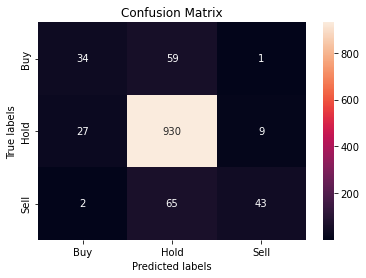

In [70]:
confcal(Y_test,pred)

In [71]:
dacc, ddindx, df1 =  metric(Y_test,pred)

Accuracy : 0.8606837606837607
D Index : 1.6492772048928197
F1 Score : 0.8767219366436063


In [14]:
dpf = returncal(X_test,pred)

Prediction on Test Data : 

No of shares 1036.0
Average transaction price  1113.3687664092665
Profit $149,404.03


In [15]:
np.shape(x_train)

(4680, 11)

In [185]:
inn = x_train.shape[1:][0]

from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import pandas as pd
import numpy as np

model = Sequential()
model.add(LSTM (64, return_sequences = True,input_shape = [inn,1]))
model.add(Dropout(0.2))
model.add(LSTM (32))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer='Adam',loss='mse',metrics=('accuracy') )

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 11, 64)            16896     
                                                                 
 dropout_44 (Dropout)        (None, 11, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_45 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [186]:
hist = model.fit(x_train, Y_train, batch_size=32, epochs=50, validation_split = 0.2, verbose = 0)

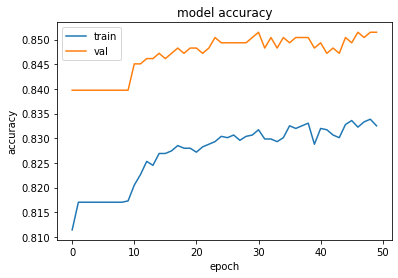

In [74]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

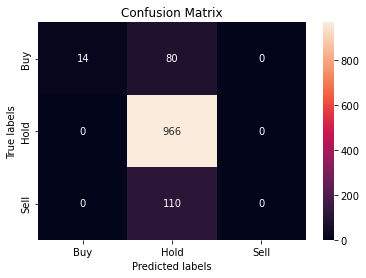

In [187]:
pred = model.predict(x_test)
confcal(Y_test,pred.round())

In [188]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.15      0.26        94
           1       0.84      1.00      0.91       966
           2       0.00      0.00      0.00       110

    accuracy                           0.84      1170
   macro avg       0.61      0.38      0.39      1170
weighted avg       0.77      0.84      0.77      1170



C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
lacc, ldindx, lf1 =  metric(Y_test,pred.round())

Accuracy : 0.8376068376068376
D Index : 1.436009904571523
F1 Score : 0.8948003247749762


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
lpf = returncal(X_test,pred.round())

Prediction on Test Data : 

No of shares 1138.0
Average transaction price  106.71637609841828
Profit $3,350.07


In [189]:
from keras.layers import Conv1D, Flatten

model = Sequential()
model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(inn,1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 9, 16)             64        
                                                                 
 flatten_8 (Flatten)         (None, 144)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 145       
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [190]:
hist = model.fit(x_train, Y_train, batch_size=32, epochs=50, validation_split = 0.2, verbose = 0)

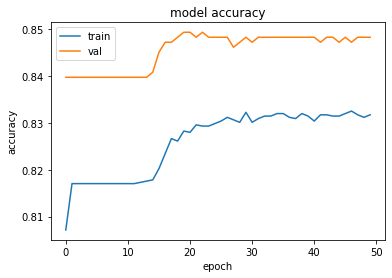

In [81]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       0.25      0.24      0.25        79
           1       0.86      0.95      0.90       926
           2       0.84      0.35      0.49       165

    accuracy                           0.82      1170
   macro avg       0.65      0.51      0.55      1170
weighted avg       0.82      0.82      0.80      1170



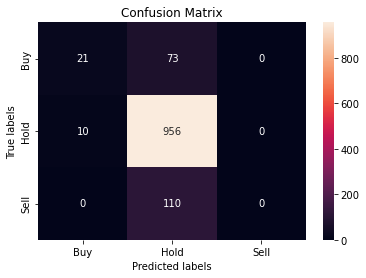

In [191]:
pred = model.predict(x_test)
confcal(Y_test,pred.round())

In [192]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.68      0.22      0.34        94
           1       0.84      0.99      0.91       966
           2       0.00      0.00      0.00       110

    accuracy                           0.84      1170
   macro avg       0.51      0.40      0.41      1170
weighted avg       0.75      0.84      0.78      1170



C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
cacc, cdindx, cf1 =  metric(Y_test,pred.round())

Accuracy : 0.8350427350427351
D Index : 1.4219927115469544
F1 Score : 0.8923815583076256


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
cpf = returncal(X_test,pred.round())

Prediction on Test Data : 

No of shares 1137.0
Average transaction price  106.68659278803871
Profit $3,490.64


In [193]:
from sklearn.ensemble import ExtraTreesClassifier
clf =  ExtraTreesClassifier(n_estimators=100, random_state=0).fit( X_train, Y_train)
clf.fit( x_train, Y_train)

pred = clf.predict(x_test)
print(clf.score(x_test, Y_test))

0.8760683760683761


In [194]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.39      0.51        94
           1       0.89      0.97      0.93       966
           2       0.75      0.45      0.56       110

    accuracy                           0.88      1170
   macro avg       0.79      0.60      0.67      1170
weighted avg       0.86      0.88      0.86      1170



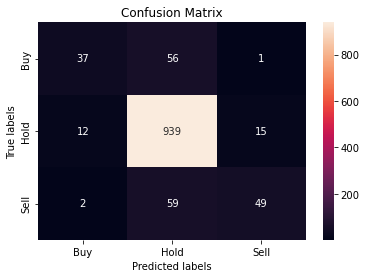

In [86]:
confcal(Y_test,pred)

In [88]:
eacc, edindx, ef1 =  metric(Y_test,pred)

Accuracy : 0.8760683760683761
D Index : 1.6971322938160072
F1 Score : 0.8908842024786034


In [89]:
epf = returncal(X_test,pred)

Prediction on Test Data : 

No of shares 989.0
Average transaction price  107.06158442871586
Profit $18,909.39


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
    
calc = traindata()

le = LabelEncoder()
le.fit(calc['action'])
list(le.classes_)
label = le.transform(calc['action'])
df1 = calc
df1 = df1.drop(['Date','action','temp','tempsum','sum'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(df1, label, test_size=0.20, random_state=42)
x_train = StandardScaler().fit_transform(X_train)
x_test  = StandardScaler().fit_transform(X_test)

C:\Users\chsha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [196]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [197]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
np.shape(x_test)

(1170, 11, 1)

In [198]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mse",
    optimizer='Adam',
    metrics=['accuracy'],
)
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

hist = model.fit(
    x_train,
    Y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=64,
    callbacks=callbacks,
)


Epoch 1/8
59/59 [==============================] - 42s 480ms/step - loss: 0.2423 - accuracy: 0.7829 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 2/8
59/59 [==============================] - 25s 419ms/step - loss: 0.1829 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 3/8
59/59 [==============================] - 25s 417ms/step - loss: 0.1829 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 4/8
59/59 [==============================] - 25s 427ms/step - loss: 0.1830 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 5/8
59/59 [==============================] - 26s 438ms/step - loss: 0.1830 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 6/8
59/59 [==============================] - 25s 429ms/step - loss: 0.1829 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 7/8
59/59 [==============================] - 24s 400ms/step - loss: 0.1828 - accuracy: 0.8170 - val_loss: 0.1602 - val_accuracy: 0.8397
Epoch 

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       115
           1       0.89      0.98      0.93       948
           2       0.76      0.21      0.32       107

    accuracy                           0.88      1170
   macro avg       0.81      0.61      0.65      1170
weighted avg       0.86      0.88      0.85      1170



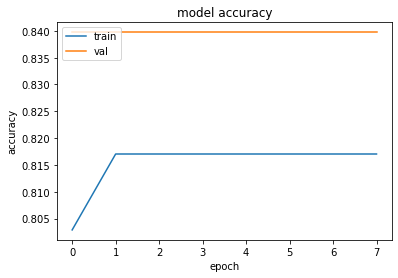

In [94]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

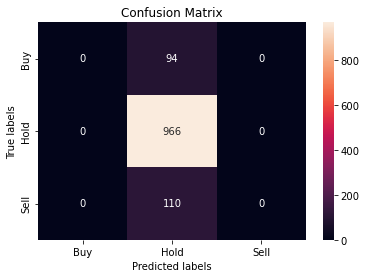

In [199]:
pred = model.predict(x_test)
confcal(Y_test,pred.round())

In [73]:
tacc, tdindx, tf1 =  metric(Y_test,pred.round())

Accuracy : 0.8393162393162393
D Index : 1.4959462447517007
F1 Score : 0.8966127624567125


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.83      1.00      0.90       966
           2       0.00      0.00      0.00       110

    accuracy                           0.83      1170
   macro avg       0.28      0.33      0.30      1170
weighted avg       0.68      0.83      0.75      1170



C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
tpf = returncal(X_test,pred.round())

Prediction on Test Data : 

No of shares 1170.0
Average transaction price  106.66094102564102
Profit $0.00


C:\Users\chsha\AppData\Local\Temp/ipykernel_15180/1937535649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["action"] = pred


In [206]:
from sklearn.utils import class_weight
c = class_weight.compute_class_weight('balanced', np.unique(Y_train),Y_train)
c

C:\Users\chsha\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2], y=[1 1 1 ... 1 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([3.92947103, 0.40572172, 3.56164384])

In [207]:
class_weight = {0: sqrt(c[0]),
                1: sqrt(c[1]),
                2: sqrt(c[2])}
class_weight

{0: 1.9822893413287557, 1: 0.6369628847232424, 2: 1.8872317917035095}

In [ ]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3,  activation='relu', input_shape=(inn,1)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
hist = model.fit(x_train, Y_train, batch_size=32,epochs=50,validation_split = 0.2, verbose = 0,class_weight=class_weight)

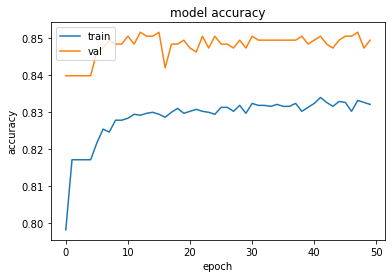

In [101]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(x_test)
confcal(Y_test,pred.round())

In [205]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred.round()))

              precision    recall  f1-score   support

           0       0.61      0.30      0.40        94
           1       0.84      0.98      0.91       966
           2       0.00      0.00      0.00       110

    accuracy                           0.84      1170
   macro avg       0.48      0.43      0.44      1170
weighted avg       0.75      0.84      0.78      1170



C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
wacc, wdindx, wf1 =  metric(Y_test,pred.round())

Accuracy : 0.8358974358974359
D Index : 1.426726161172717
F1 Score : 0.8880057467872143


C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
wpf = returncal(X_test,pred.round())

Prediction on Test Data : 

No of shares 1121.0
Average transaction price  106.69318198037467
Profit $5,190.24


C:\Users\chsha\AppData\Local\Temp/ipykernel_15180/1937535649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["action"] = pred


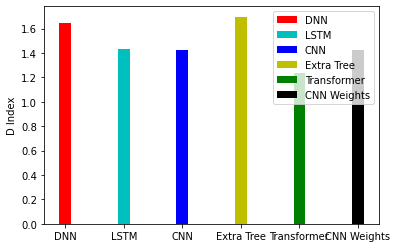

In [105]:
fig=plt.figure(figsize=(6,4))
bar1 = plt.bar("DNN", ddindx, color= 'r',width = .2)
bar2 = plt.bar("LSTM", ldindx, color= 'c', width = .2)
bar3 = plt.bar("CNN", cdindx, color= 'b',width = .2)
bar4 = plt.bar("Extra Tree", edindx, color= 'y', width = .2)
bar5 = plt.bar("Transformer", tdindx, color= 'g',width = .2)
bar6 = plt.bar("CNN Weights", wdindx, color= 'k', width = .2)
    
plt.legend( (bar1,bar2,bar3,bar4,bar5,bar6), ("DNN","LSTM","CNN","Extra Tree","Transformer","CNN Weights") )
plt.ylabel("D Index")
plt.show()

array([0, 0, 0, ..., 1, 1, 1])